Day2 NYC High School Directory Exploration

1) Setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2) Load and Preview Data

df = pd.read_csv("high-school-directory.csv")

# Preview
df.head()
df.shape
df.info()

3) Clean Column Names

In [12]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace(r"[^\w\s]", "", regex=True)
)
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,location_1,community_board,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,"Q113, Q22",A to Beach 25th St-Wavecrest,8-21 Bay 25 Street,Far Rockaway,NY,11691,http://schools.nyc.gov/schoolportals/27/Q260,412.0,Far Rockaway Educational Campus,NaN,Frederick Douglass Academy (FDA) VI High Schoo...,"Advisory, Graphic Arts Design, Teaching Intern...",Spanish,"Calculus AB, English Language and Composition,...","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework ...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hos...","York College, Brooklyn College, St. John's Col...",NaN,"Queens District Attorney, Sports and Arts Foun...","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),"Uniform Required: plain white collared shirt, ...","Extended Day Program, Student Summer Orientati...",7:45 AM,2:05 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to Queens students or residents who a...,Then to New York City residents who attend an ...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.601989336', 'longitude': '-73...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",1014 Lafayette Avenue,Brooklyn,NY,11221,http://schools.nyc.gov/schoolportals/16/K393,155.0,NaN,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"C

4)a) Filter for Brooklyn

In [18]:
brooklyn_schools = df[df["borough"].str.upper() == "BROOKLYN"]

b) Count Total Schools in Brooklyn

In [19]:
total_brooklyn_schools = brooklyn_schools["dbn"].nunique()
print("Total schools in Brooklyn:", total_brooklyn_schools)

Total schools in Brooklyn: 121


c) Schools in Brooklyn with Grade 9 Entry

In [20]:
df["grade_span_max"] = pd.to_numeric(df["grade_span_max"], errors="coerce")
df["grade_span_min"] = pd.to_numeric(df["grade_span_min"], errors="coerce")

brooklyn_with_9 = brooklyn_schools[
    (brooklyn_schools["grade_span_min"] <= 9) & 
    (brooklyn_schools["grade_span_max"] >= 9)
]["dbn"].nunique()

print("Brooklyn schools offering Grade 9 entry:", brooklyn_with_9)

Brooklyn schools offering Grade 9 entry: 121


5) Group & Summarize

a) Count of Schools per Borough

In [21]:
schools_per_borough = df.groupby("borough")["dbn"].nunique()
print(schools_per_borough)

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


b) Average Number of Students per Borough

In [22]:
avg_students = df.groupby("borough")["total_students"].mean()
print(avg_students)

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


c) Summary of Grade Span Max by Borough

In [23]:
summary_grade_span = df.groupby("borough")["grade_span_max"].describe()
print(summary_grade_span)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


6) Visualization

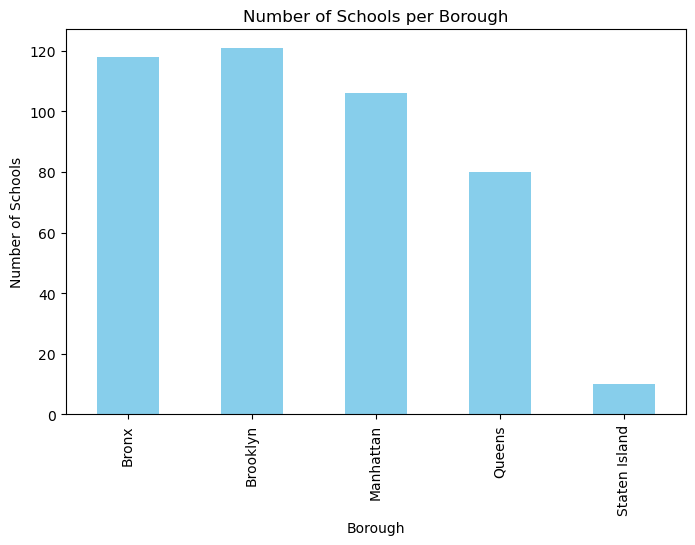

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
schools_per_borough.plot(kind="bar", color="skyblue")
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.show()

7) Key Insights

- Brooklyn has the highest number of schools compared to other boroughs.

- The average number of students is largest in [X Borough], suggesting bigger schools.

- Grade span distribution shows that [X Borough] tends to have more K–12 schools, while   others have more specialized grade spans.